### Importing Dependencies and Reading Data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_column', None)

from datetime import datetime,timedelta
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\s_sad\Downloads\marketing_campaign.csv", sep='\t')
df = pd.DataFrame(data)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info() # checking datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isna().sum() # checking NaN values in dataset

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
#As we can see, there are only nan values in Income, they have been replaced with means of dataset. 
df['Income'].fillna((df['Income'].mean()), inplace=True)

df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
#changing to lower case
df.columns  =df.columns.str.lower()

In [7]:
# renaming columns: 
df=df.rename(columns={'NumWebPurchases': "web_purchase",'NumCatalogPurchases':'catalog_purchase','NumStorePurchases':'store_purchase'})

In [8]:
numerical_df = df.select_dtypes(include = np.number)
numerical_df

,id,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


Column names acceptedcmp1,acceptedcmp2,acceptcamp3,acceptedcmp4 are categorical columns which either have value yes or no, which has been transformed into 1 and 0, so actually they are categorical variables not numerical. 

## Cleaning Categorical Data 

In [9]:
categorical_df = df.select_dtypes(include = np.object)
categorical_df

,education,marital_status,dt_customer
0,Graduation,Single,04-09-2012
1,Graduation,Single,08-03-2014
2,Graduation,Together,21-08-2013
3,Graduation,Together,10-02-2014
4,PhD,Married,19-01-2014
...,...,...,...
2235,Graduation,Married,13-06-2013
2236,PhD,Together,10-06-2014
2237,Graduation,Divorced,25-01-2014
2238,Master,Together,24-01-2014


In [10]:
df.education.value_counts() 

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64

In [11]:
# clean Marital Status
df.marital_status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64

#### Modifying column "marital_status" 

In [12]:
def clean_marital_status_col(x):
    if x in ["Single", "Divorced","Widow", "Alone", "Absurd", "YOLO"]:
        return "Alone"
    elif x in ['Married', 'Together']:
        return "Together"
df["marital_status"] = df["marital_status"].apply(clean_marital_status_col)
df["marital_status"] = df["marital_status"].apply(lambda x: clean_marital_status_col(x))
df.marital_status.value_counts()

Together    1444
Alone        796
Name: marital_status, dtype: int64

#### Modfiying "education"

In [13]:
def clean_education_col(x):
    if x in ["Basic", "2n Cycle"]:
        return "Undergraduate"
    elif x in ["Graduation","Master"]:
        return "Graduate"
    else:
        return x
df['education'] = df['education'].apply(lambda x: clean_education_col(x))
df.education.value_counts()

Graduate         1497
PhD               486
Undergraduate     257
Name: education, dtype: int64

##  Ordinal Encoder to Categorical Variables 

In [14]:
# applying ordinal encoder to categorical variables.
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[["education","marital_status"]])
df[["education","marital_status"]] = enc.transform(df[["education", "marital_status"]])


### Cleaning And Adding new Features In Numerical Data

In [15]:
numerical_df = df.select_dtypes(include = np.number)
numerical_df

,id,year_birth,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,0.0,0.0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,0.0,0.0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,0.0,1.0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,0.0,1.0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,1.0,1.0,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,0.0,1.0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,1.0,1.0,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,0.0,0.0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,0.0,1.0,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [16]:
df.education.value_counts()

0.0    1497
1.0     486
2.0     257
Name: education, dtype: int64

### Cleaning Numerical Variables 

In [17]:
# creating column "age" from year_birth
df['dt_customer'] = pd.to_datetime(df['dt_customer'])
# checking latest date of customer registration in company so that, I can use it to minus it from birth year

In [18]:
df['dt_customer'].max() # latest registration date of a customer is 2014

Timestamp('2014-12-06 00:00:00')

In [19]:
df['age'] = 2014-df['year_birth']#.astype(int)
print("The youngest customer:", df.age.min())
print("The oldest customer:", df.age.max())

The youngest customer: 18
The oldest customer: 121


In [20]:
# Creating new column named "total_spending"
df['total_spending'] = df['mntwines']+df['mntfruits']+df['mntmeatproducts']+ df['mntfishproducts']+df['mntsweetproducts']+df['mntgoldprods']
# new column for total number of children
df['children'] = df['kidhome'] + df['teenhome']
# calculating family size

df['family_size'] = df['marital_status']+ df['children']
# total number of campaigns accepted by customers
df['total_accepted_camp'] = df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5']

In [21]:
df = df[(df["income"]<600000)] # in order to remove extreme values from income column

In [22]:
#drop unimportant columns
df = df.drop(columns=['id','dt_customer', 'year_birth','z_costcontact', 'z_revenue','acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5'])

### K-Means Algorithm for Clustering

Steps to follow:

    1. Decide no. of clusters, by selecting approproiate value of K
    2. Choose random K-points
    3. Each data point will be assigned to its nearest centroid and this will form a predefined cluster.
    4. Now we shall calculate variance and position a new centroid for every cluster.
    5. The 3rd step will be repeated, meaning, every data point will be assigned to the new nearest centroid.
    6. If a reassignment has occurred then step-4 shall be executed otherwise execution finishes.
    7. Finally, the model is ready

In [23]:
#importing dependencies
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
df_clustering = df.copy(deep = False) # creating copy of dataset
df_clustering

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,total_spending,children,family_size,total_accepted_camp
0,0.0,0.0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,57,1617,0,0.0,0
1,0.0,0.0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,60,27,2,2.0,0
2,0.0,1.0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,49,776,0,1.0,0
3,0.0,1.0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,30,53,1,2.0,0
4,1.0,1.0,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,33,422,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,1.0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,47,1341,1,2.0,0
2236,1.0,1.0,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,68,444,3,4.0,1
2237,0.0,0.0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,33,1241,0,0.0,1
2238,0.0,1.0,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,58,843,1,2.0,0


In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(df_clustering)
dfx = pd.DataFrame(data=X, columns=df_clustering.columns)
dfx

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,total_spending,children,family_size,total_accepted_camp
0,-0.646867,-1.346408,0.288013,-0.824769,-0.930282,0.306624,0.983339,1.551126,1.679196,2.461517,1.476020,0.842815,0.349782,1.408863,2.510257,-0.551136,0.693887,-0.097304,2.388220,0.984922,1.678944,-1.264195,-1.758601,-0.439154
1,-0.646867,-1.346408,-0.262958,1.033035,0.906491,-0.384051,-0.870826,-0.636311,-0.713430,-0.650588,-0.631700,-0.729179,-0.167840,-1.110374,-0.568888,-1.166440,-0.130311,-0.097304,-0.418722,1.235281,-0.961639,1.396080,0.446668,-0.439154
2,-0.646867,0.742717,0.917515,-0.824769,-0.930282,-0.798456,0.362313,0.570551,-0.177305,1.344820,-0.147167,-0.039035,-0.685461,1.408863,-0.226761,1.294778,-0.542410,-0.097304,-0.418722,0.317300,0.282258,-1.264195,-0.655966,-0.439154
3,-0.646867,0.742717,-1.183175,1.033035,-0.930282,-0.798456,-0.870826,-0.560882,-0.651399,-0.504136,-0.583247,-0.748349,-0.167840,-0.750483,-0.911015,-0.551136,0.281788,-0.097304,-0.418722,-1.268304,-0.918460,0.065942,0.446668,-0.439154
4,0.801468,0.742717,0.295254,1.033035,-0.930282,1.549838,-0.389456,0.419693,-0.217182,0.154898,-0.001807,-0.556643,1.385025,0.329190,0.115367,0.064169,-0.130311,-0.097304,-0.418722,-1.017946,-0.305645,0.065942,0.446668,-0.439154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,-0.646867,0.742717,0.432133,-0.824769,0.906491,-0.107781,1.203224,0.419693,0.066389,0.081672,2.202820,3.890950,-0.167840,1.768754,0.115367,-0.551136,-0.130311,-0.097304,-0.418722,0.150394,1.220579,0.065942,0.446668,-0.439154
2235,0.801468,0.742717,0.562518,2.890839,0.906491,0.237556,0.302884,-0.661454,-0.607091,-0.687201,-0.655927,-0.690837,2.420268,1.408863,-0.226761,-0.243484,0.693887,-0.097304,-0.418722,1.902903,-0.269109,2.726217,2.651937,1.035008
2236,-0.646867,-1.346408,0.233963,-0.824769,-0.930282,1.446237,1.794536,0.545408,0.221466,-0.101393,-0.365207,-0.384107,-0.685461,-0.750483,0.115367,2.217734,0.281788,-0.097304,-0.418722,-1.017946,1.054505,-1.264195,-1.758601,1.035008
2237,-0.646867,0.742717,0.806891,-0.824769,0.906491,-1.420063,0.368255,0.092835,0.208174,0.777319,0.070873,0.325208,-0.167840,0.689081,0.799621,1.294778,-0.954509,-0.097304,-0.418722,1.068375,0.393528,0.065942,0.446668,-0.439154


### Applying PCA 

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
data = pca.fit_transform(dfx)

### Finding Optimum Value of K¶
#### Elbow Method with within-Cluster-Sum of Squared Error(WCSS)

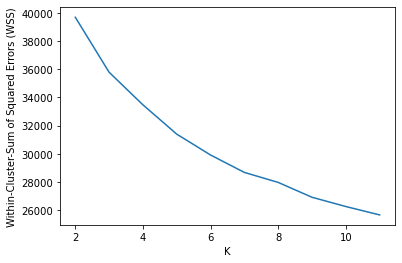

In [27]:
K=range(2,12)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(dfx)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

We can't see very clear elbow in the picture, but we will try to use 4 clusters because after that point the curve is getting flatter quickly.

In [28]:
#applying Kmeans with 4 cluster(K= 4)
km = KMeans(n_clusters = 4, random_state = 0)
label = km.fit(dfx)
centers = km.cluster_centers_
label.labels_

array([2, 1, 0, ..., 2, 0, 1])

In [29]:
pca_data = pd.DataFrame(data,columns=(['PC1','PC2','PC3','PC4']))
pca_data.insert (0, 'Cluster', label.labels_)    # add labels to dataframe
df_clustering['Cluster'] = pca_data['Cluster']
df_clustering

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,total_spending,children,family_size,total_accepted_camp,Cluster
0,0.0,0.0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,1,57,1617,0,0.0,0,2.0
1,0.0,0.0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,60,27,2,2.0,0,1.0
2,0.0,1.0,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,49,776,0,1.0,0,0.0
3,0.0,1.0,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,30,53,1,2.0,0,3.0
4,1.0,1.0,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,33,422,1,2.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,1.0,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,47,1341,1,2.0,0,1.0
2236,1.0,1.0,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,68,444,3,4.0,1,2.0
2237,0.0,0.0,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,0,33,1241,0,0.0,1,0.0
2238,0.0,1.0,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,58,843,1,2.0,0,1.0


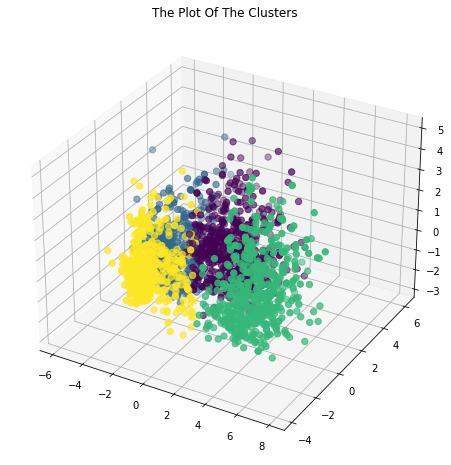

In [30]:
#Plotting the clusters
x= pca_data['PC1']
y= pca_data['PC2']
z =pca_data['PC3']

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_data["Cluster"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

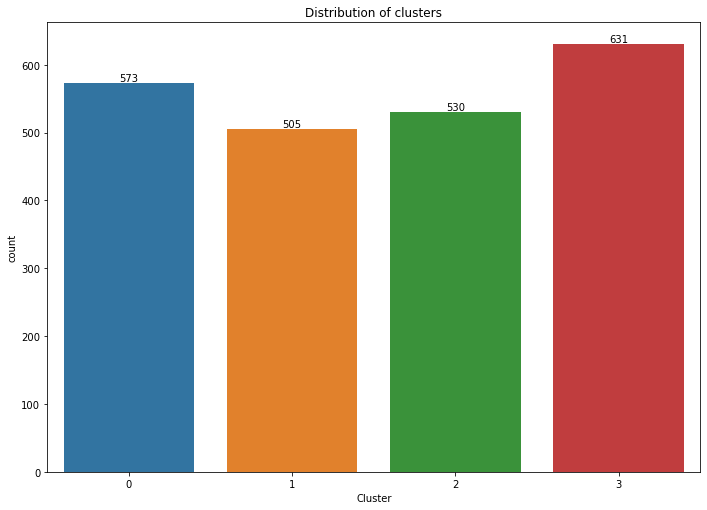

In [31]:
# plotting countplot of clusters
from matplotlib import rcParams
sns.dark_palette("#69d", reverse=True, as_cmap=True)
rcParams['figure.figsize'] = 11.7,8.27
ax = sns.countplot(x= pca_data['Cluster'])
ax.bar_label(ax.containers[0])
ax.set_title("Distribution of clusters")
plt.show()


<AxesSubplot:xlabel='total_spending', ylabel='income'>

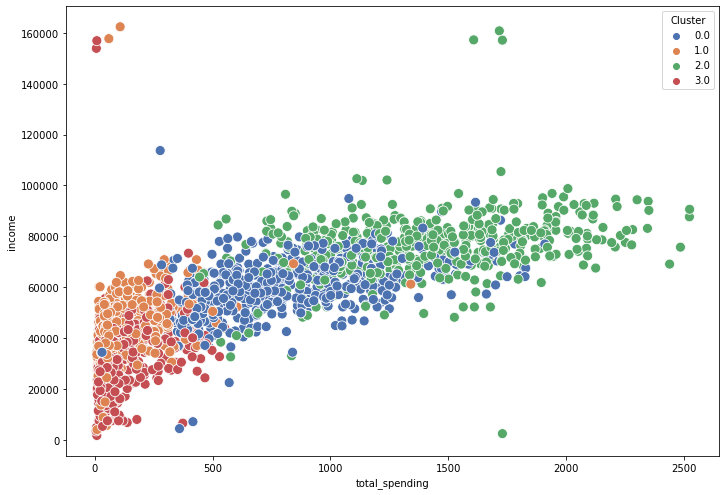

In [32]:
# Clusters and income and spending behavior
from matplotlib import rcParams
sequential_colors = sns.color_palette("RdPu", 10)
rcParams['figure.figsize'] = 11.7,8.27
sns.scatterplot(data = data, 
                x =df_clustering['total_spending'], 
                y = df_clustering['income'], 
                hue = df_clustering['Cluster'],palette = "deep", s = 100)

1. Cluster 0, average income, high Spending
2. Cluster 1, higher income, low spending
3. Cluster 2, High Spending and high income
4. Cluster 3, low income and high Spending


<AxesSubplot:xlabel='Cluster', ylabel='total_spending'>

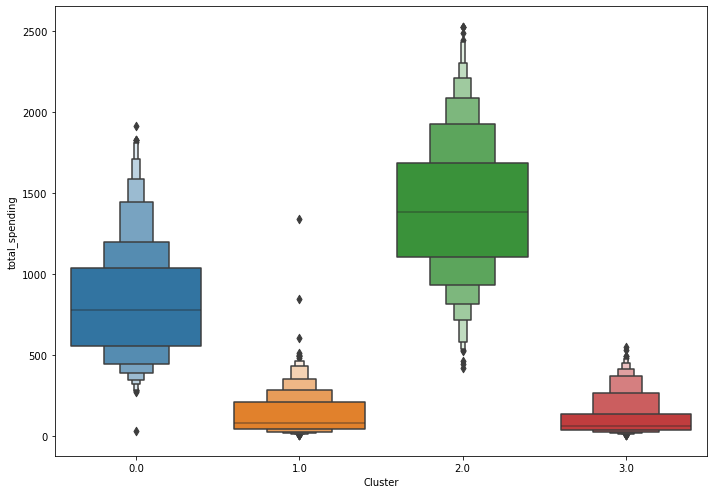

In [33]:
# Spending behaviour of different clusters
sns.boxenplot(x=df_clustering['Cluster'], y = df_clustering['total_spending']) 

1. Cluster 0 Spending range b/w 200 -1800
2. Cluster 1 , spending b/w 0 to 500
3. Cluster 2, Spending b/w 500 -2500
4. Cluster 3, spending b/w 0-600. 

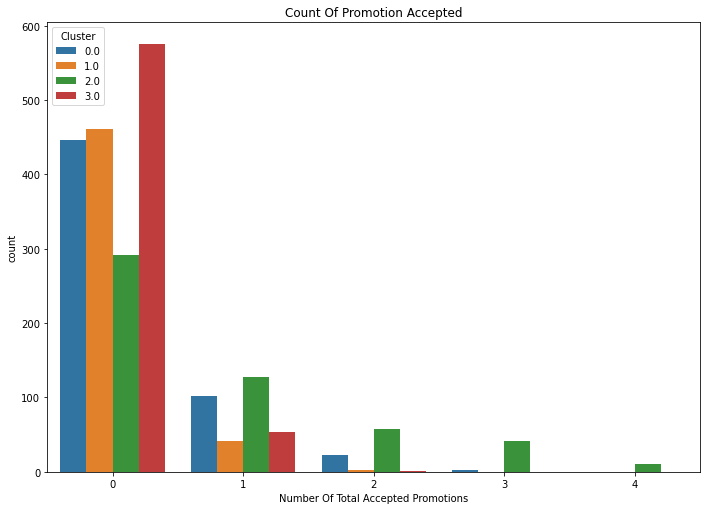

In [34]:
# Clusters and their campaign acceptance
plt.figure()
pl = sns.countplot(x=df_clustering["total_accepted_camp"],hue=df_clustering["Cluster"])
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

1. Cluster 0, most customers only accepted 1 campaign. Very little proportion accepted 2 campaigns.
2. Cluster 1, Few of them accepted campaign and only once. 
3. Cluster 2, looks active in accepting campaigns as compared other clusters. 
4. Cluster 3, has very poor response.


<AxesSubplot:xlabel='Cluster', ylabel='numdealspurchases'>

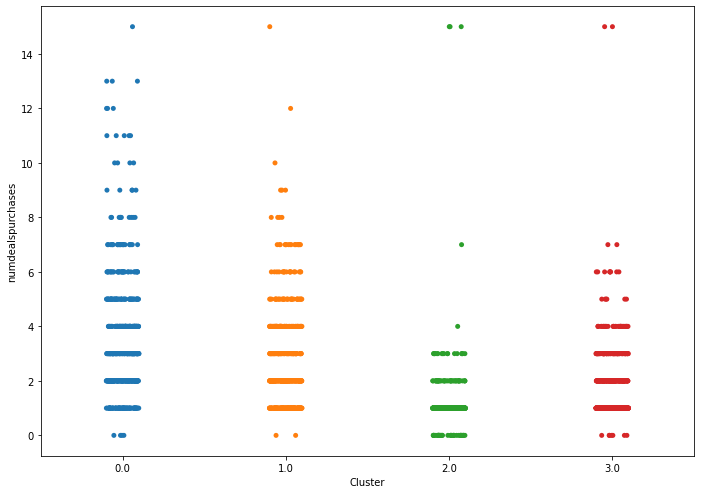

In [35]:
sns.stripplot(x= df_clustering['Cluster'],y=df_clustering["numdealspurchases"])

1. Cluster 0, very active in accepting vouchers
2. Cluster 1, total number of discount purchases is mediocre.
3. Cluster 2, does not look very attractive to discount purchases
4. Cluster 3, also look very  responsive to campaigns


<AxesSubplot:xlabel='Cluster', ylabel='numwebpurchases'>

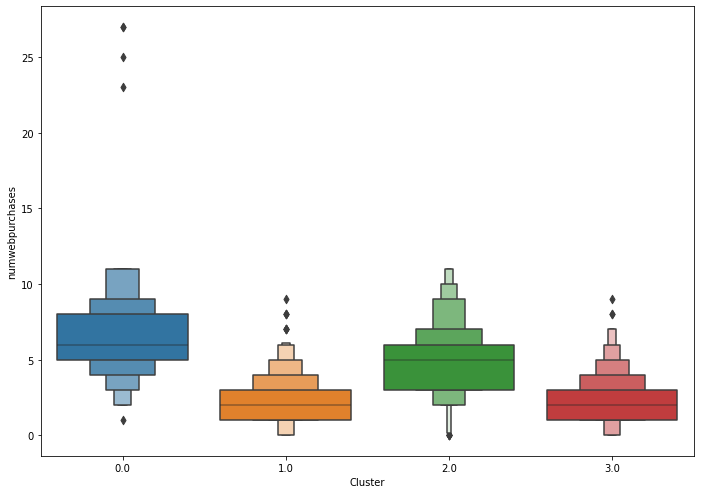

In [36]:
sns.boxenplot(x=df_clustering['Cluster'], y = df_clustering['numwebpurchases'])

### Demographic Properties of Clusters

<Figure size 842.4x595.44 with 0 Axes>

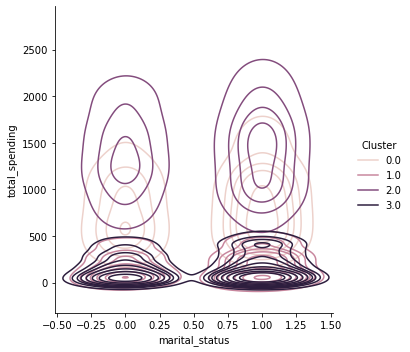

In [37]:
# Marital Status and Clusters
plt.figure()
rcParams['figure.figsize'] = 11.7,8.27
pl = sns.displot(data=df_clustering, x="marital_status", y="total_spending", hue="Cluster", kind = 'kde')

plt.show()

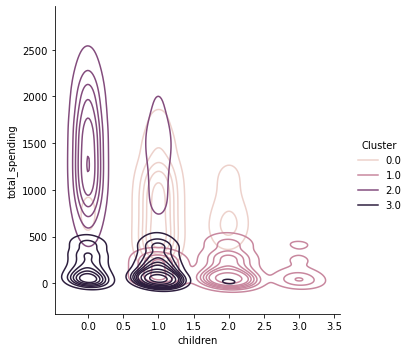

In [38]:
# Children and Clusters
pl = sns.displot(data=df_clustering, x="children", y="total_spending", hue="Cluster", kind = 'kde')

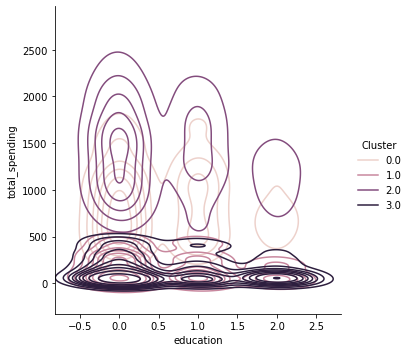

In [39]:
# Education and Clusters
pl = sns.displot(data=df_clustering, x="education", y="total_spending", hue="Cluster", kind = 'kde')

<Figure size 842.4x595.44 with 0 Axes>

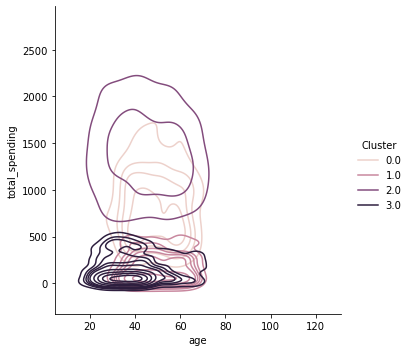

In [40]:
plt.figure()
rcParams['figure.figsize'] = 11.7,8.27
pl = sns.displot(data=df_clustering, x="age", y="total_spending", hue="Cluster", kind = 'kde')

plt.show()

1. Cluster 0 , age range b/w 35-70
2. Cluster 1, age ranges b/w 35-65
3. Cluster 2, have young and old customers.
4. Cluster 3, Most of customers are young to middle aged ranges b/w 20-45


### Concluding Remarks 

Based on Cluster analysis, it looks like Cluster 2 is the cluster of most active customers. They are high income and high spending cluster and also very active in accepting campaigns. May be a company can target this cluster of ppl for lunching campaign and can formulate other strategies for other clusters. Let us now see how does their classification look like.

## Classification -- Logistic Regression 

After applying clusters, now we will see how our campaign(response) is behaving in differnet clusters. For that purpose we have divided the dataset into 4 parts and ran the model on them one by one.

In [41]:
# 4 datasets based on clustering
df1 = df_clustering[df_clustering['Cluster'] == 0]
df2 = df_clustering[df_clustering['Cluster'] == 1]
df3 = df_clustering[df_clustering['Cluster'] == 2]
df4 = df_clustering[df_clustering['Cluster'] == 3]

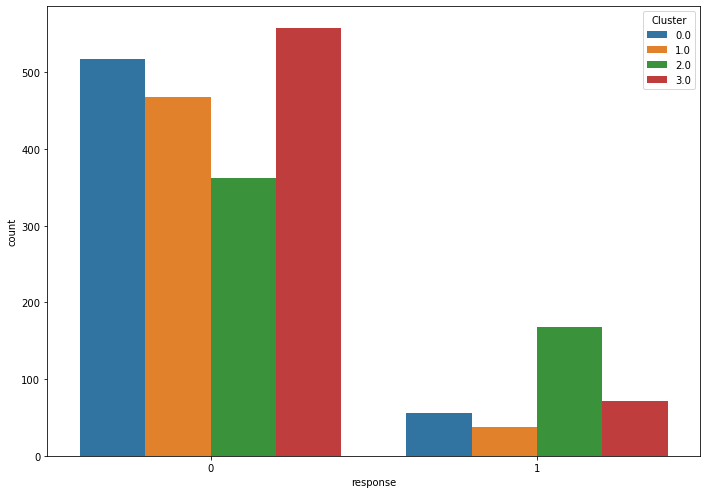

In [42]:
# As before response is our target variable
pl = sns.countplot(x=df_clustering["response"],hue=df_clustering["Cluster"])

From the plot, we can see that our target variable is imbalanced in all clusters, in order to avoid the problem of overfitting class_weights will be used.

In [43]:
# defining models 
def model_inplace(scaler,model,X_train,X_test,y_train,y_test):
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("score on train set:", model.score(X_train,y_train))
    print("score on test set:", model.score(X_test,y_test))
    print("f1 score on train set:", f1_score(y_train,pred_train))
    print("F1 score on trest set:", f1_score(y_test,pred_test))
    print('Recall train: %.3f' % recall_score(y_train, pred_train))
    print('Recall test: %.3f' % recall_score(y_test, pred_test))

In [44]:
lr = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear', class_weight = 'balanced') # randomly choosen hyperparameters, as we got best result in classifiication

In [45]:
# defining scalers
scaler1 = StandardScaler()


### Modeling on Cluster 0

In [46]:
X = df1.drop(['response'],axis = 1)
X= pd.get_dummies(X)
y = df1["response"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)
model_inplace(scaler1,lr,X_train,X_test,y_train,y_test)

score on train set: 0.8144104803493449
score on test set: 0.782608695652174
f1 score on train set: 0.49101796407185627
F1 score on trest set: 0.3243243243243243
Recall train: 0.872
Recall test: 0.667


### Modeling on Cluster 1

In [47]:
X = df2.drop(['response'],axis = 1)
X= pd.get_dummies(X)
y = df2["response"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)
model_inplace(scaler1,lr,X_train,X_test,y_train,y_test)

score on train set: 0.8787128712871287
score on test set: 0.9207920792079208
f1 score on train set: 0.5504587155963303
F1 score on trest set: 0.5555555555555556
Recall train: 0.938
Recall test: 1.000


### Modeling on Cluster 2 

In [48]:
X = df3.drop(['response'],axis = 1)
X= pd.get_dummies(X)
y = df3["response"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)
model_inplace(scaler1,lr,X_train,X_test,y_train,y_test)

score on train set: 0.8066037735849056
score on test set: 0.839622641509434
f1 score on train set: 0.7172413793103448
F1 score on trest set: 0.7999999999999999
Recall train: 0.806
Recall test: 0.872


### Modeling on Cluster 3

In [49]:
X = df4.drop(['response'],axis = 1)
X= pd.get_dummies(X)
y = df4["response"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)
model_inplace(scaler1,lr,X_train,X_test,y_train,y_test)

score on train set: 0.8472222222222222
score on test set: 0.7936507936507936
f1 score on train set: 0.5882352941176471
F1 score on trest set: 0.2777777777777778
Recall train: 0.873
Recall test: 0.556


Cluster 1 and Cluster 2 are performing very well as campared to other clusters, So launching campaigns on these 2 clusters can provide us better results. Based on the anaylsis done, campany can decide different strategies for each cluster. 